# Exploring Music Tastes Within a Group
Katie Connor, Anna Repp, Serena Luo  
DS 2000 S20 Final Project

*This project aims to explore music listening tastes within a group of people, and use the results of the analysis to create playlists of song recommendations.*

In [1]:
import spotify_functions as sf

## Part I: Getting user data
The first part of the code authenticates a main user to interact with the Spotify API, and then asks for all usernames in the group to be analyzed. For each user, track information from their most recent Wrapped playlist (titled "Your Top Songs 2019") is added to the master dict.  

**If you wish to input your own Spotify data, please run the code below. Otherwise, skip to the next code block.**

In [ ]:
playlists = sf.get_playlists()

*If you would like to save your playlist data, please run this cell:* 

In [ ]:
sf.playlists_to_csv(playlists, 'INSERT_FILENAME_HERE.csv')

**If you wish to import data from CSV, please run this cell:**

In [2]:
playlists = sf.csv_to_playlists('music_data.csv')

To make data processing easier, we created a Playlist class. It contains a username (str), playlist id (str), playlist length (int), and track data (pandas DataFrame). Although the Spotify API does provide a function to get playlist tracks, we found that the data provided was not detailed enough. As a result, we had to call the API once for every track to use the **audio_features** function, which provides specific track data such as danceability, energy, and acousticness. These audio features, which are generated by Spotify, give a more detailed overview of each song.

## Part II: Calculating similarity

We had to come up with a method to calculate similarity between any two users. To do this, we first decided to count the number of songs or artists that were common to a user pair. However, these counts tended to be low and not very informative. 

As a result, we started to incorporate audio features. For each user, we calculated an average audio feature score for each of the six features we explored (danceability, energy, acousticness, instrumentalness, speechiness, valence). We also calculated what percentage of a pair's combined songs/artists/genres were not shared (a pair with 5/10 artists in common would have 0.5 artist difference, while a pair with 1/10 artists in common would have 0.9 artist difference). 

Using these average audio feature and difference percentage values, we used euclidean distance to calculate similarity between the user pair:

*dist = sqrt((avg_dance_1 - avg_dance_2)^2 + (avg_energy_1 - avg_energy_2)^2 ... (avg_val_1 - avg_val_2)^2 + artist_diff^2 + song_diff^2 + genre_diff^2)*

## Part III: Visualizing data

Multiple parts of the data analysis process lended themselves to visualization. We made visualizations at two steps: exploring the audio feature data, and understanding our calculated similarity scores.

### III A: Audio features
To begin with, we plotted every user's average audio feature score for all six features. This shows us what the group's average tastes look like, and gives us a sense of the ideal audio attribute range for a song that could be enjoyed by every member of the group (discussed further in part iv). 

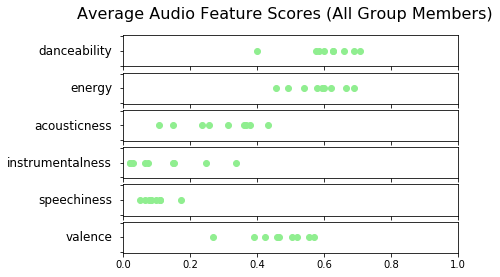

In [3]:
sf.viz_features(playlists)

We can also use these graphs to determine where the group's listening tastes lie compared to Spotify's full discography. The API documentation provides distributions for every audio feature.

When comparing the danceability feature scores to the given distribution, we can see that the average scores are concentrated where the heaviest distribution is.

![](https://developer.spotify.com/assets/audio/danceability.png)

However, the average instrumentalness scores deviate more from the distribution. Two of the users in the group have average instrumentalness scores of at least 0.2, signaling that they likely listen to more instrumental music than the average person. 

![](https://developer.spotify.com/assets/audio/instrumentalness.png)

### III B: Similarity scores

We were also able to visualize the similarity scores that we calculated using a network diagram. Each node represents a different user, and the number on each edge (line connecting nodes) is their similarity score. Due to the fact that the actual calculated scores tend to be very close together (the scores in the group ranged from 1.64 to 1.76), the plotted scores were adjusted:

- Lowest similarity score = closest bond = represented as 0 on chart  
- Highest similarity score = weakest bond = represented as 10 on chart  
- All other similarity scores redistributed on the 0-10 scale

A subset of the sample data is visualized, as the chart becomes messy once too many nodes are added. If time allowed, we would improve the chart by using edge colors to represent similarity (heavy color = more similar, light color = less similar).

//anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


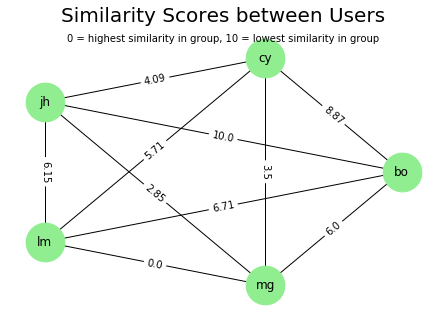

In [4]:
sf.plot_network(playlists[0:5])

//anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


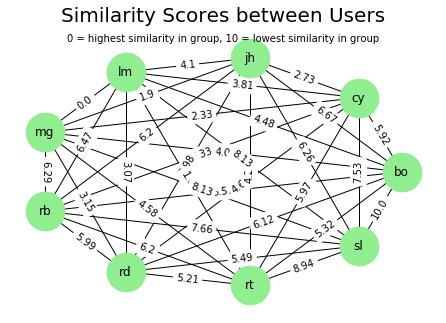

In [5]:
# The full, messy version
sf.plot_network(playlists)

We also added a fun wordcloud to show which genres showed up the most in the group, which gave us a small taste of the huge number of genres that Spotify tags its artists with. 

*(Check out [everynoise](http://everynoise.com/) by Glenn McDonald for more!)*

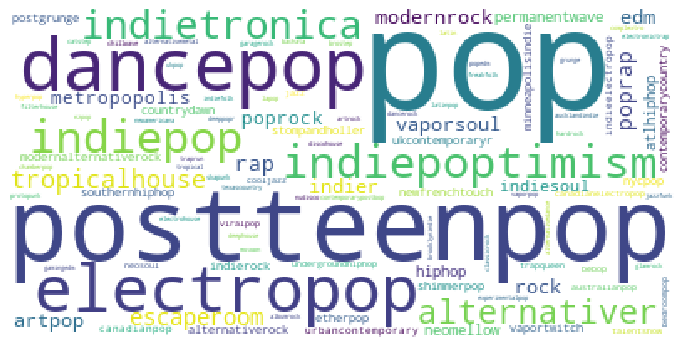

In [6]:
sf.generate_wordcloud(sf.genre_words(playlists))

## Part IV: Generating playlist recommendations

The final part of our project involved generating a playlist recommendation for the group. To do this, we first determined what genres were listened to by more than one user in the group. Then we concatenated the track information from every group playlist, and filtered out songs that did not fall in the list of shared genres. We also filtered on audio features by selecting only songs that had a danceability value between the minimum and maximum group average scores. 

We could have filtered on more audio features, but this led to short or nonexistent playlists when generating playlists for small groups. 

To improve this playlist generator, we could bias the track selection towards genres that appeared more frequently in the group. For example, if every person in a five-member group listened to pop but only two listened to rock, we could select more pop songs in the output playlist (5 pop songs to 2 rock songs). 

Another improvement would be incorporating new music into the playlist. Because the group playlist is pulled from everyone's concatenated tracks, that means that every song in the generated playlist has been listened to by at least one person. If we had a method of pulling songs from Spotify by genre, we could add new music into the playlist while making sure that those songs still fell within the group ranges for audio features.

*All genres listened to by more than one person in the group*

In [7]:
print(sf.group_genres(playlists))

['post-teen pop', 'pop', 'electropop', 'dance pop', 'indie pop', 'indie poptimism', 'alternative r&b', 'escape room', 'tropical house', 'indietronica', 'rap', 'pop rap', 'indie r&b', 'edm', 'vapor soul', 'modern rock', 'pop rock', 'rock', 'metropopolis', 'art pop', '', 'hip hop', 'neo mellow', 'indie soul', 'permanent wave', 'atl hip hop', 'vapor twitch', 'alternative rock', 'stomp and holler', 'modern alternative rock', 'nyc pop', 'minneapolis indie', 'etherpop', 'contemporary country', 'urban contemporary', 'talent show', 'australian pop', 'indie electropop', 'canadian pop', 'new french touch', 'canadian electropop', 'post-grunge', 'uk contemporary r&b', 'viral pop', 'underground hip hop', 'trap queen', 'bedroom pop', 'southern hip hop', 'cool jazz', 'country dawn', 'neo soul', 'r&b', 'indie rock', 'shimmer pop', 'jazz', 'bebop']


*First five songs from the generated recommendation playlist*

In [8]:
suggested = sf.select_common_tastes(playlists)

print(suggested.head())

                  track_id                     track_name  \
2   3LHSXwp5RubVBqxK8Ljp5v        Pure Water (with Migos)   
6   2iUb7DLswcEXEmsdD878no        Aftertaste (feat. Opia)   
13  7GoQM8NWyznqve47jNn6et  Odyssey (Feat. Danyka Nadeau)   
16  7gGOHJH7SsRYPUEraqaKIh                         Luv Ya   
17  3raTxbibtTZruSHwldoVO9                    Pay My Rent   

                       artists  \
2             [Mustard, Migos]   
6              [Whethan, Opia]   
13  [Televisor, Danyka Nadeau]   
16         [Potatohead People]   
17                      [DNCE]   

                                          artist_ids  
2   [0YinUQ50QDB7ZxSCLyQ40k, 6oMuImdp5ZcFhWP0ESe6mG]  
6   [0vqJkZ0RpLZixt3lTmD8vP, 70zHrrrPfBkVV44AEhFyyh]  
13  [5h4HpujvLoTaqy2tkrs2DC, 2dVIbEt8BdjznykrUuSCDc]  
16                          [2lmWYYMM80tsoDES4aUB1m]  
17                          [6T5tfhQCknKG4UnH90qGnz]  


Using our authorization code from the beginning of the project, we were able to take the recommended songs from our analysis project and turn them into actual Spotify playlists. Running the below cell will authorize a user, create a new Spotify playlist in that user's library, and insert the recommended tracks.

In [ ]:
sf.create_spotify_playlist(suggested)

If the group does not want to create a playlist in Spotify, the suggested tracks can also be saved as a CSV.

In [ ]:
suggested.to_csv('suggestedplaylist.csv', index=False)